# E-Commerce – EDA – Python Project 2 


### Context of Data 
#### Company - UK-based and registered non-store online retail. 
#### Products for selling - Mainly all-occasion gifts .
#### Customers - Most are wholesalers (local or international) .
#### Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year). 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import csv

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [3]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Neelam Yadav\\Documents\\python\\Assignment-2\\Ecommerce - UK Retailer.csv",encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [20]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [21]:
df.shape

(541909, 8)

In [4]:
df_new = df[(df['Quantity'] >= 0)]

In [5]:
#Add the columns - Month, Day and Hour for the invoice
df_new['InvoiceDate'] = df_new['InvoiceDate'].astype('datetime64[ns]')
df_new['Year'] = df_new.InvoiceDate.dt.year
df_new['Month'] = df_new.InvoiceDate.dt.month
df_new['year_month']=df_new.InvoiceDate.map(lambda x: 100*x.year + x.month)
df_new['Day']=(df_new.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
df_new['Hour'] = df_new.InvoiceDate.dt.hour
df_new['Revenue'] = df_new['Quantity'] * df_new['UnitPrice']
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34


## Problem Statements: 
### Q1. Perform Basic EDA 

### Q1.a. Boxplot – All Numeric Variables 

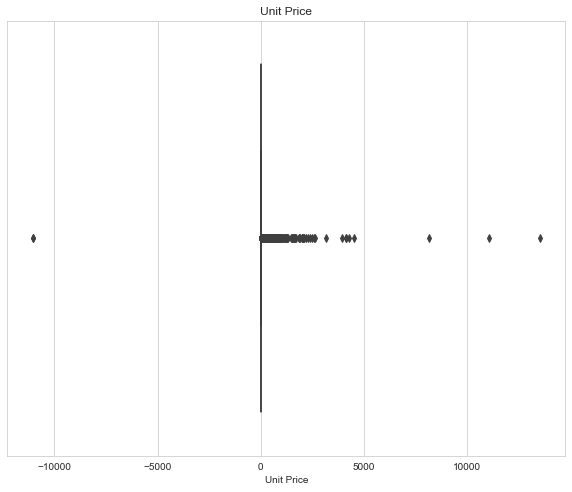

In [24]:
# Box Plot
plt.subplots(figsize=(10,8))
sns.boxplot(df_new.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.show()

### Q1.b. Histogram – All Numeric Variables 

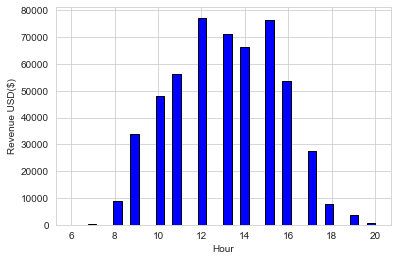

In [25]:
# Histogram (graphical representation of numerical data distribution)
plt.hist(df_new['Hour'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Hour')
plt.ylabel('Revenue USD($)')
plt.show()

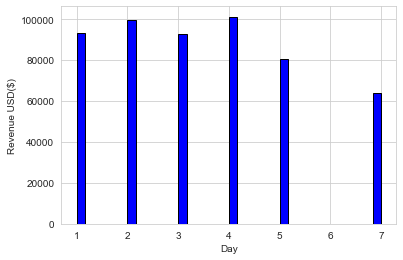

In [26]:
plt.hist(df_new['Day'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Day')
plt.ylabel('Revenue USD($)')
plt.show()

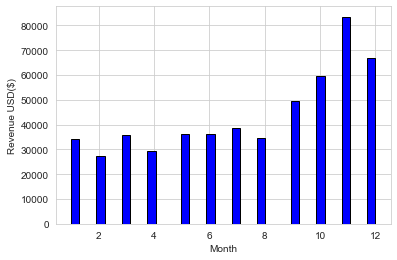

In [27]:
plt.hist(df_new['Month'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Month')
plt.ylabel('Revenue USD($)')
plt.show()

### Q1.c. Distribution Plot – All Numeric Variables 

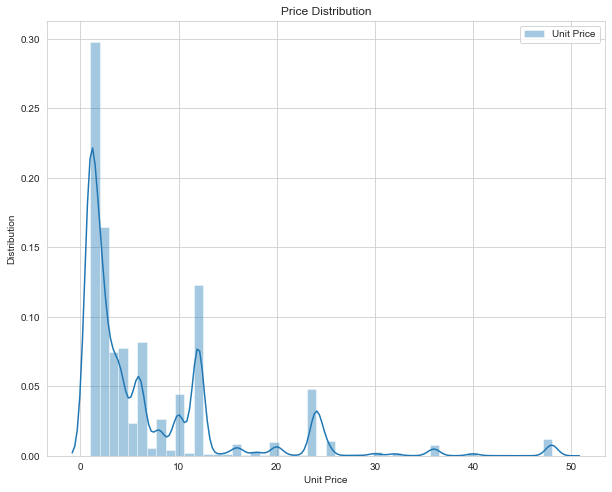

In [28]:

# distribition plot (Skewed +ve)
# If a data set has a positive skew, 
# but the mean of the returns is negative, it means that overall performance is negative
# but here mean is positive hence performance is considerd as to be good
plt.subplots(figsize=(10,8))
sns.distplot(df_new.Quantity[df_new.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()





### Q1.d. Aggregation for all numerical Columns 

In [29]:
#Aggregation for all numerical Columns
df_new.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,year_month,Day,Hour,Revenue
count,531285.000000,531285.000000,397924.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.00000
mean,10.655262,3.857296,15294.315171,2010.921543,7.560244,201099.714549,3.435561,13.076259,20.03550
std,156.830323,41.810047,1713.169877,0.268890,3.508717,25.800406,1.849816,2.438303,270.91237
min,1.000000,-11062.060000,12346.000000,2010.000000,1.000000,201012.000000,1.000000,6.000000,-11062.06000
25%,1.000000,1.250000,13969.000000,2011.000000,5.000000,201103.000000,2.000000,11.000000,3.75000
50%,3.000000,2.080000,15159.000000,2011.000000,8.000000,201107.000000,3.000000,13.000000,9.90000
75%,10.000000,4.130000,16795.000000,2011.000000,11.000000,201110.000000,5.000000,15.000000,17.70000
max,80995.000000,13541.330000,18287.000000,2011.000000,12.000000,201112.000000,7.000000,20.000000,168469.60000


### Q1.e. Unique Values across all columns 

In [30]:
#Unique values across colmn
#.ravel(): as below
#returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
pd.unique(df_new[['Country','Description','StockCode','Country']].values.ravel())


array(['United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER', '85123A',
       ..., 'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE', '23843'], dtype=object)

### Q1.f. Duplicate values across all columns 

In [31]:
#Remove duplicate column
 
df.drop_duplicates(keep=False,inplace=True)

### Q1.g. Correlation – Heatmap - All Numeric Variables 

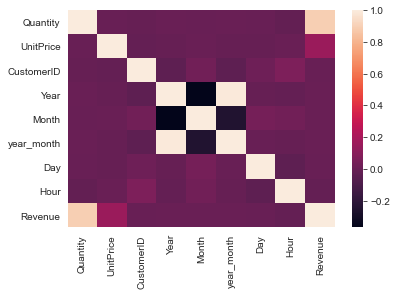

In [32]:

# Heat Map
sns.heatmap(df_new.corr())
plt.show()


### Q1.h. Regression Plot - All Numeric Variables 

In [33]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

### Q1.i. Bar Plot – Every Categorical Variable vs every Numerical Variable 

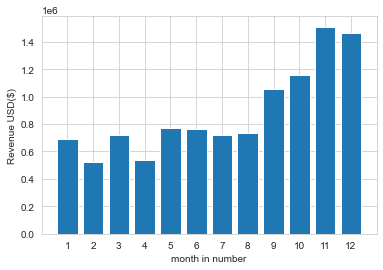

In [34]:
# Bar Plot 
result=df_new.groupby('Month').sum()
month=range(1,13)
plt.bar(month,result['Revenue'])
plt.xticks(month)
plt.xlabel('month in number')
plt.ylabel('Revenue USD($)')
plt.show()

### Q1.j. Pair plot - All Numeric Variables 

In [ ]:
# Pair plot allows us to see both distribution of single variables and relationships between two variables.
sns.pairplot(df_new,vars=["Quantity","UnitPrice","Revenue","Month","Day"])
plt.show()
# due to system incapability can't able to print the output

### Q1.k. Line chart to show the trend of data - All Numeric/Date Variables 

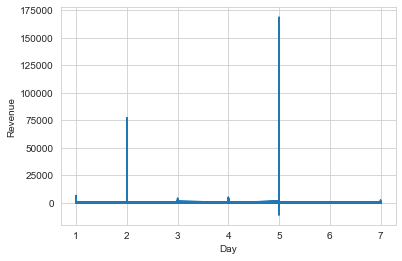

In [31]:
#Line chart to show the trend of data 

plt.plot(df_new['Day'],df_new['Revenue'])
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()





### Q1.l. Plot the skewness - All Numeric Variables

In [34]:
# skewness 
df_new.skew(axis=0,skipna=True)

Quantity      460.130967
UnitPrice      60.552895
CustomerID      0.033149
Year           -3.135448
Month          -0.417780
year_month     -3.047498
Day             0.466762
Hour            0.000429
Revenue       502.218534
dtype: float64

In [35]:
df_new.skew(axis=1,skipna=True)

0         2.957284
1         2.957288
2         2.957290
3         2.957288
4         2.957288
            ...   
541904    2.978223
541905    2.978222
541906    2.978224
541907    2.978224
541908    2.978223
Length: 531285, dtype: float64

# Data cleaning

### Q.2.Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 

In [6]:
#Check for missing values in all columns and replace them with the appropriate metric
# In our data there is no missing/blank value in main column 'Quantity','UnitPrice','Country','InvoiceDate'
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
 8   Year         531285 non-null  int64         
 9   Month        531285 non-null  int64         
 10  year_month   531285 non-null  int64         
 11  Day          531285 non-null  int64         
 12  Hour         531285 non-null  int64         
 13  Revenue      531285 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 60.8+ MB


In [7]:
print(f"Missing values :\n{df.isnull().sum()}")

Missing values :
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
df['Description'].mode()[0]

'WHITE HANGING HEART T-LIGHT HOLDER'

In [9]:
df['Description'].fillna(df['Description'].mode()[0],inplace=True)

In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [11]:
round(df['CustomerID'].mean())

15288

In [12]:
df['CustomerID'].fillna(df['CustomerID'].mean(),inplace=True)

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Q3. Remove duplicate rows 

In [14]:
#Remove duplicate rows
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Q4. Remove rows which have negative values in Quantity column. 

In [15]:
#Remove negative values in colmn 'Quantity'
df_new = df[(df['Quantity'] >= 0)]

### Q5. Add the columns - Month, Day and Hour for the invoice.

In [17]:
#Add the columns - Month, Day and Hour for the invoice
df_new['InvoiceDate'] = df_new['InvoiceDate'].astype('datetime64[ns]')
df_new['Year'] = df_new.InvoiceDate.dt.year
df_new['Month'] = df_new.InvoiceDate.dt.month
df_new['year_month']=df_new.InvoiceDate.map(lambda x: 100*x.year + x.month)
df_new['Day']=(df_new.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
df_new['Hour'] = df_new.InvoiceDate.dt.hour
df_new['Revenue'] = df_new['Quantity'] * df_new['UnitPrice']
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34


### Q6. How many orders made by the customers? 

In [18]:
index = pd.Index(df_new['Quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 531285


In [19]:
total_order=df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(10)
print(total_order)

   CustomerID         Country  InvoiceNo
0     12346.0  United Kingdom          1
1     12347.0         Iceland        182
2     12348.0         Finland         31
3     12349.0           Italy         73
4     12350.0          Norway         17
5     12352.0          Norway         85
6     12353.0         Bahrain          4
7     12354.0           Spain         58
8     12355.0         Bahrain         13
9     12356.0        Portugal         59




 

### Q7. TOP 5 customers with higher number of orders 


In [20]:
total_order.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
1,12347.0,Iceland,182
5,12352.0,Norway,85
3,12349.0,Italy,73
9,12356.0,Portugal,59
7,12354.0,Spain,58


### Q8. How much money spent by the customers? 

In [21]:
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['Revenue'].sum()
print(money_spent)

      CustomerID         Country   Revenue
0        12346.0  United Kingdom  77183.60
1        12347.0         Iceland   4310.00
2        12348.0         Finland   1797.24
3        12349.0           Italy   1757.55
4        12350.0          Norway    334.40
...          ...             ...       ...
4351     18280.0  United Kingdom    180.60
4352     18281.0  United Kingdom     80.82
4353     18282.0  United Kingdom    178.05
4354     18283.0  United Kingdom   2094.88
4355     18287.0  United Kingdom   1837.28

[4356 rows x 3 columns]


### Q9. TOP 5 customers with highest money spent

In [22]:
money_spent.sort_values(by='Revenue', ascending=False).head()

,CustomerID,Country,Revenue
2176,15287.69057,United Kingdom,1.694706e+06
1698,14646.00000,Netherlands,2.802060e+05
4219,18102.00000,United Kingdom,2.596573e+05
3746,17450.00000,United Kingdom,1.945508e+05
3026,16446.00000,United Kingdom,1.684725e+05


### Q10. How many orders per month?

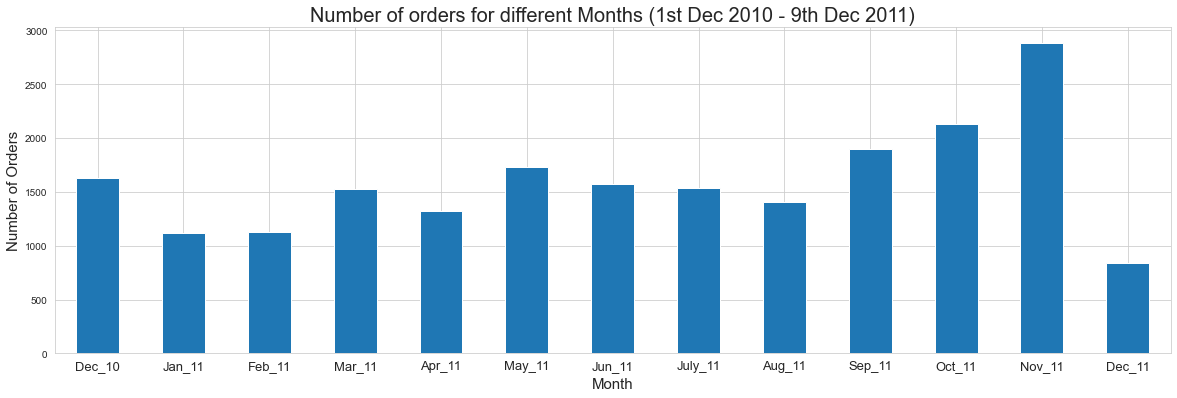

In [23]:

yum = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(20,6))
yum.set_xlabel('Month',fontsize=15)
yum.set_ylabel('Number of Orders',fontsize=15)
yum.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=20)
yum.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

### Q11. How many orders per day? 

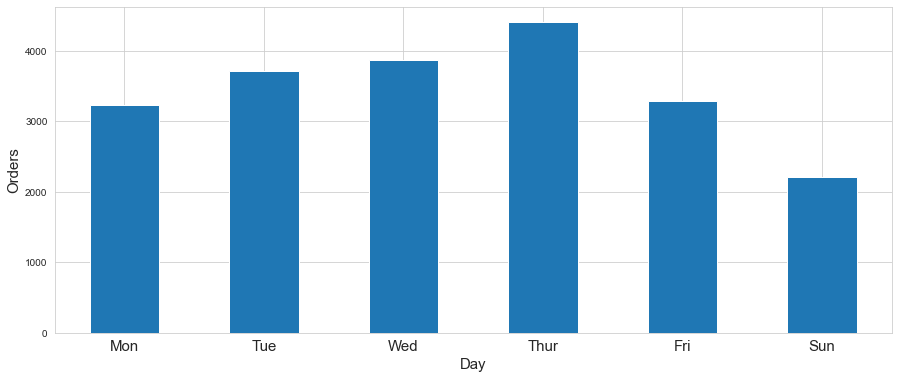

In [24]:
ax = df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Orders',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()


 
 

### Q12. How many orders per hour? 


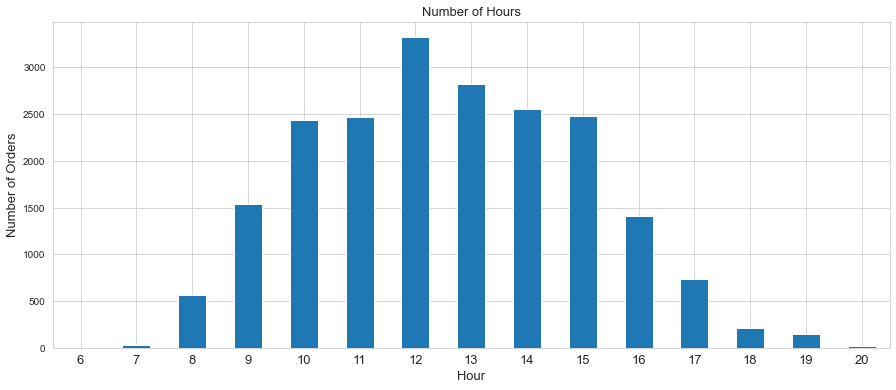

In [25]:
ax = df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=13)
ax.set_ylabel('Number of Orders',fontsize=13)
ax.set_title('Number of Hours',fontsize=13)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()

### Q13. How many orders for each country? 

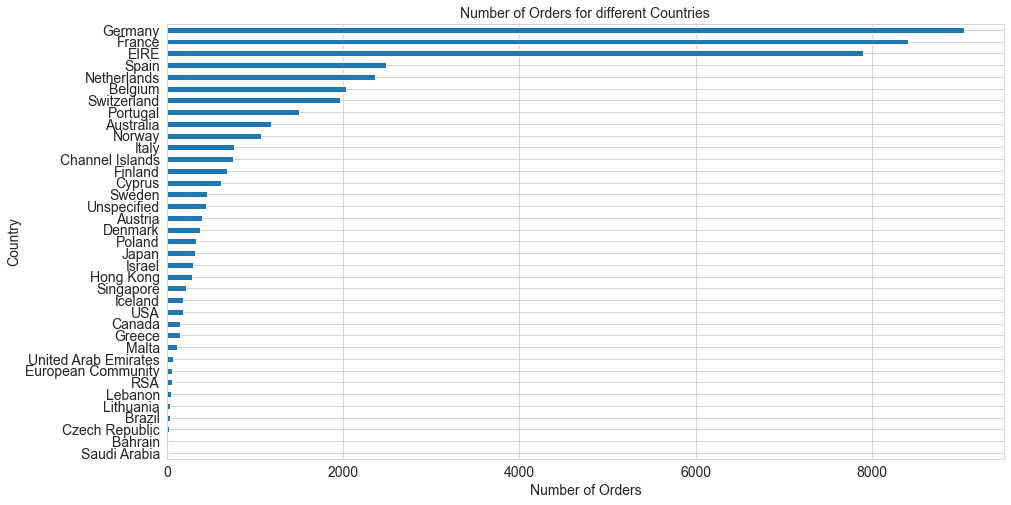

In [26]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

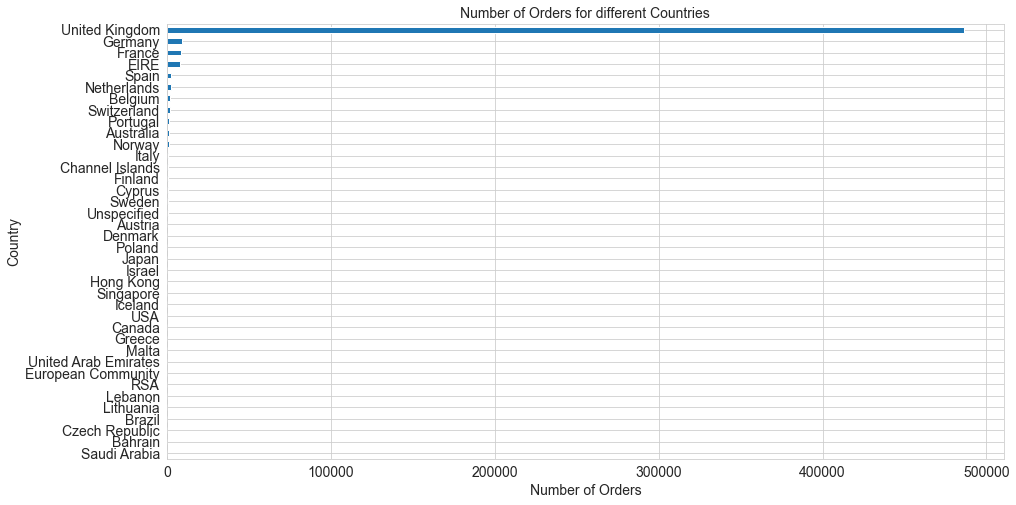

In [27]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
#del group_country_orders['United Kingdom']

# number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

### Q14. Orders trend across months 

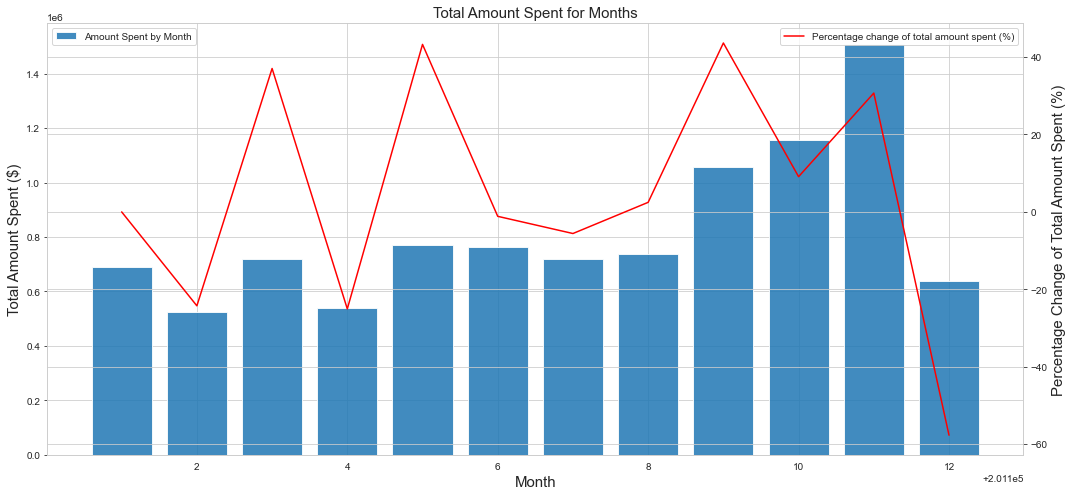

In [28]:
# trend plot
fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:],
        df_new.groupby(by=['year_month'])['Revenue'].sum()[1:],
        alpha=0.85,#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
        label='Amount Spent by Month')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

#pct_change()Percentage change between the current and a prior element.
x2.plot(df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:], 
         df_new.groupby(by=['year_month'])['Revenue'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

### Q15. How much money spent by each country?

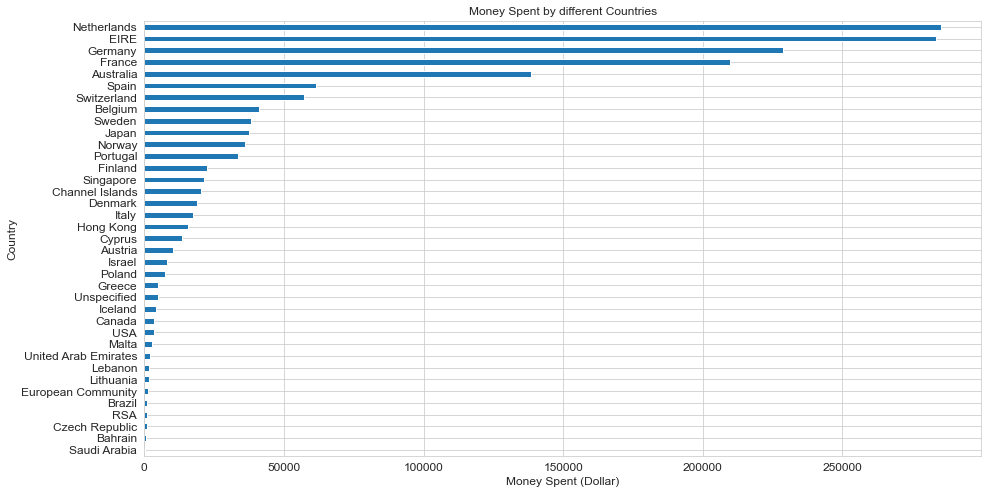

In [29]:
group_country_amount_spent = df_new.groupby('Country')['Revenue'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()



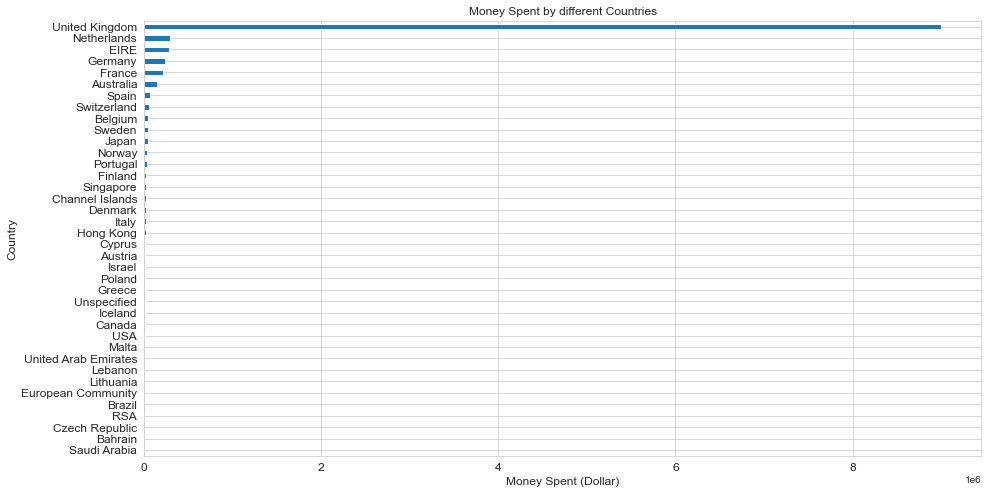

In [30]:
group_country_amount_spent = df_new.groupby('Country')['Revenue'].sum().sort_values()
#del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()